Greetings! In this notebook I am going to work with a MLB dataset from 2011. The dataset contains various features about a teams season - e.g. homeruns, bat_avg, wins, etc. I'm going to model the data to best predict the teams runs. Along the way I will test the hypothesis that the newer variables (new_onbase, new_slug, new_obs) used in the famous film "Money ball" perform better than the traditional variables used for predicting a teams runs. 

### Starting with a simple Linear Regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from IPython.display import display
%matplotlib inline

In [3]:
mlb = pd.read_csv('mlb11.csv')
mlb.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In [4]:
mlb.shape

(30, 12)

In [5]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
team            30 non-null object
runs            30 non-null int64
at_bats         30 non-null int64
hits            30 non-null int64
homeruns        30 non-null int64
bat_avg         30 non-null float64
strikeouts      30 non-null int64
stolen_bases    30 non-null int64
wins            30 non-null int64
new_onbase      30 non-null float64
new_slug        30 non-null float64
new_obs         30 non-null float64
dtypes: float64(4), int64(7), object(1)
memory usage: 2.9+ KB


In [8]:
features = pd.Series(mlb.columns)
features

0             team
1             runs
2          at_bats
3             hits
4         homeruns
5          bat_avg
6       strikeouts
7     stolen_bases
8             wins
9       new_onbase
10        new_slug
11         new_obs
dtype: object

### I'll use a scatter plot to display the relationship between runs (response) and at_bats (predictor). The relationship looks moderately linear. Because it looks linear, I feel comfortable using a linear model to predict the number of runs.

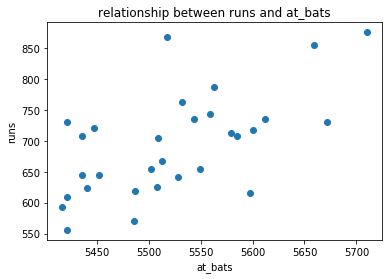

In [9]:
plt.scatter(mlb.at_bats, mlb.runs)
plt.ylabel('runs')
plt.xlabel('at_bats')
plt.title('relationship between runs and at_bats')
plt.show()

In [10]:
mlb[['runs', 'at_bats']].corr()

,runs,at_bats
runs,1.000000,0.610627
at_bats,0.610627,1.000000


R of 0.61. Which shows a strong positive correlation between runs and at_bats.

### The relationship looks positive. The relationship appears to be linear, positive, and moderate to strong. There also appears to be some values on the scatter plot that look like outliers.

In [15]:
#Building linear model using Sci-kit learn
import sklearn.linear_model

x = pd.DataFrame(mlb['at_bats'])
y_true = pd.DataFrame(mlb['runs'])

model = sklearn.linear_model.LinearRegression()
model.fit(x, y_true)
print('training score', model.score(x, y_true))
print('coefficient', model.coef_)
print('intercept', model.intercept_)

training score 0.3728653901868054
coefficient [[0.63054999]]
intercept [-2789.24288544]


## Least squares regression line

## runs = -2789.2 + 0.63*at_bats

- The intercept for this model is -2789.2
- The slope for this model is 0.63
- The R**2 is about 37%

In [16]:
import sklearn.linear_model

x2 = pd.DataFrame(mlb['homeruns'])
y_true2 = pd.DataFrame(mlb['runs'])

model2 = sklearn.linear_model.LinearRegression()
model2.fit(x2, y_true2)
print('training score', model2.score(x2, y_true2))
print('coefficient', model2.coef_)
print('intercept', model2.intercept_)

training score 0.6265635695662828
coefficient [[1.83454162]]
intercept [415.23888492]


## Regression line

runs = 415.24 + 1.83*homeruns

## Interpreting the parameters
The slope tells us that for each additional 100 homeruns, we can expect an increase in 183 runs. Also, if a team scored 0 homeruns, we can expect at least 415.24 runs that season.

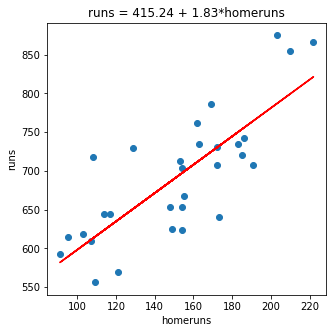

In [28]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(mlb.homeruns, mlb.runs)
ax1.plot(mlb.homeruns, 415.24 + 1.83*mlb.homeruns, color='r')
plt.title('runs = 415.24 + 1.83*homeruns')
plt.xlabel('homeruns')
plt.ylabel('runs')
plt.show()

In [17]:
y_pred = model.predict([[5578]])
y_pred

array([[727.96497461]])

In [18]:
print(model.coef_)
print(model.intercept_)

[[0.63054999]]
[-2789.24288544]


### If a team manager saw just the regression line and tried to predict runs for a team with 5,578 at_bats, they would get a prediction of about 728 runs. Because this model has a R-squared of about 37%, this prediction is likely an underestimate. The model explains about 37% of the variability in the response (runs).

In [19]:
predictions = -2789.2 + 0.63*mlb.at_bats
residuals = mlb.runs - predictions

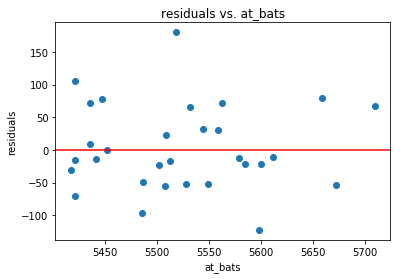

In [20]:
plt.scatter(mlb.at_bats, residuals)
plt.axhline(0, color='r')
plt.title('residuals vs. at_bats')
plt.xlabel('at_bats')
plt.ylabel('residuals')
plt.show()

### The residuals vary evenly, both positively and negatively - i.e. there is constant variance. This tell us that the model is doing a decent job of capturing the true linear relationship between at_bats and runs, but it still isnt that accurate.

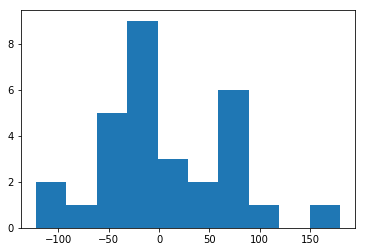

In [33]:
#nearly normal residuals
plt.hist(residuals)
plt.show()

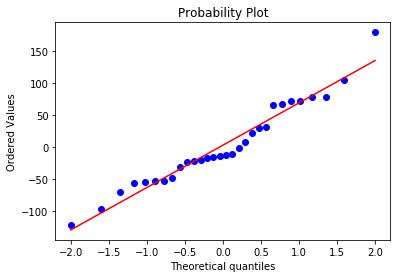

In [34]:
from scipy import stats

stats.probplot(residuals, plot=plt)
plt.show()

## Findings:

- Based on the histogram and the normal probability plot, the histogram and the normal probability chart the residuals are nearly normal.
- Based on the probability plot, there appears to be constant variablity since the residuals are nearly normal.

### Choosing another traditional variable from mlb11 that I think might be a good predictor of runs. Then i'll create a scatterplot of the two variables and fit a linear model. I am choosing bat_avg as another traditional variable to predict. 

In [35]:
mlb[['bat_avg', 'runs']].corr()

,bat_avg,runs
bat_avg,1.000000,0.809986
runs,0.809986,1.000000


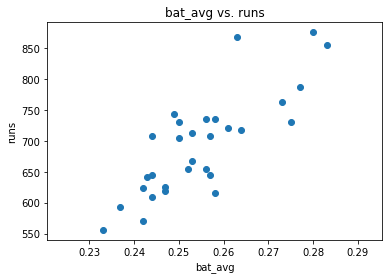

In [36]:
plt.scatter(mlb.bat_avg, mlb.runs)
plt.xlabel('bat_avg')
plt.ylabel('runs')
plt.title('bat_avg vs. runs')
plt.show()

In [21]:
X = pd.DataFrame(mlb['bat_avg'])
y = pd.DataFrame(mlb['runs'])
model3 = sklearn.linear_model.LinearRegression()
model3.fit(X, y)
print('R-squared', model3.score(X, y))
print('Coefficient', model3.coef_)
print('Intercept', model3.intercept_)

R-squared 0.656077134646863
Coefficient [[5242.22907938]]
Intercept [-642.8189333]


## Findings

- Looking at the scatterplot, one can see a moderate to strong positive correlation. I confirmed this positive correlation with an R of 0.81. 
- I then fit a linear model and got a positive coefficient of 5242.23 and an intercept of -642.81. The model had an R-squared of 0.66


The correlation between at_bats and runs is 0.61, and the correlation between bat_avg and runs is 0.81. So the relationship between bat_avg and runs is stronger than at_bats. Comparing their models, the linear model between bat_avg and runs had an R-squared of 0.66, while the linear model between at_bats and runs had an R-squared of 0.37. The bat_avg variable explained more of the variability in the response than did the at_bats predictor (a 29% difference). Because the R-squared was higher for my model, I can tell that it predicts runs better. But in order for me to really test this I would need to apply the model to new data and compare the R-squares to see how well the at_bat model generalizes.

### Investigating the relationships between runs and each of the other five traditional variables. Looking to find which variable best predicts runs.

In [43]:
mlb.columns

Index(['team', 'runs', 'at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts',
       'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs'],
      dtype='object')

In [44]:
mlb[['runs','hits', 'homeruns', 'strikeouts', 'stolen_bases', 'wins']].corr()

,runs,hits,homeruns,strikeouts,stolen_bases,wins
runs,1.000000,0.801211,0.791558,-0.411531,0.053981,0.600809
hits,0.801211,1.000000,0.470838,-0.617228,-0.126330,0.297659
homeruns,0.791558,0.470838,1.000000,-0.170755,-0.117324,0.660614
strikeouts,-0.411531,-0.617228,-0.170755,1.000000,0.087642,-0.280727
stolen_bases,0.053981,-0.126330,-0.117324,0.087642,1.000000,-0.064594
wins,0.600809,0.297659,0.660614,-0.280727,-0.064594,1.000000


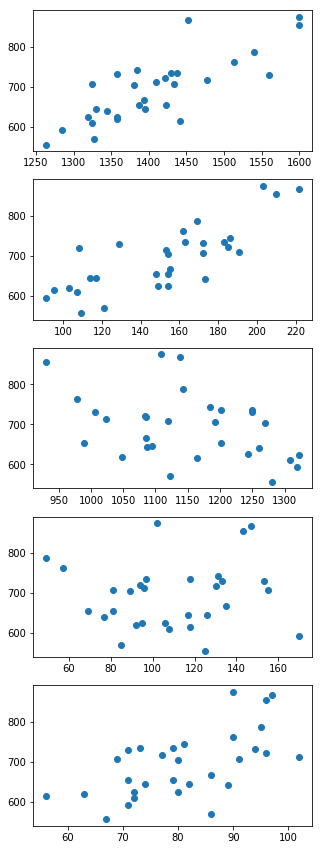

In [45]:
figure = plt.figure(figsize=(5,15))
#plot 1 
ax1 = figure.add_subplot(5,1,1)
ax1.scatter(mlb.hits, mlb.runs)
#plot 2
ax2 = figure.add_subplot(5,1,2)
ax2.scatter(mlb.homeruns, mlb.runs)
#Plot 3
ax3 = figure.add_subplot(5,1,3)
ax3.scatter(mlb.strikeouts, mlb.runs)
#plot 4
ax4 = figure.add_subplot(5,1,4)
ax4.scatter(mlb.stolen_bases, mlb.runs)
#plot 5
ax5 = figure.add_subplot(5,1,5)
ax5.scatter(mlb.wins, mlb.runs)

plt.show()

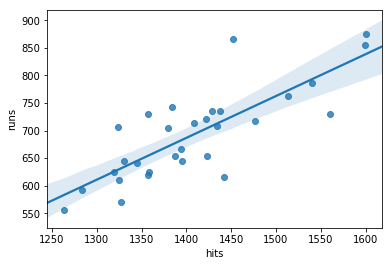

In [46]:
sns.regplot(mlb.hits, mlb.runs, data=mlb)

### Now going to examine the three newer variables. These are the statistics used by the author of Moneyball to predict a teams success. I want to know if they are more or less effective at predicting runs that the old variables.

In [47]:
mlb.columns

Index(['team', 'runs', 'at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts',
       'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs'],
      dtype='object')

In [48]:
mlb[['runs','new_onbase', 'new_slug', 'new_obs']].corr()

,runs,new_onbase,new_slug,new_obs
runs,1.000000,0.921469,0.947032,0.966916
new_onbase,0.921469,1.000000,0.871865,0.937283
new_slug,0.947032,0.871865,1.000000,0.987764
new_obs,0.966916,0.937283,0.987764,1.000000


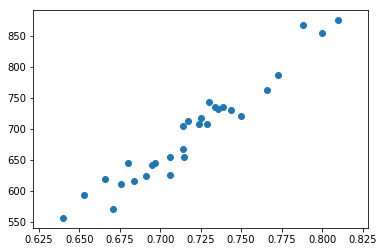

In [49]:
plt.scatter(mlb.new_obs, mlb.runs)
plt.show()

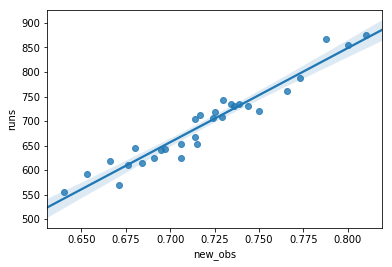

In [50]:
sns.regplot(mlb.new_obs, mlb.runs, data=mlb)
plt.show()

In [29]:
X = pd.DataFrame(mlb[['new_obs']])
Y_true = pd.DataFrame(mlb[['runs']])

lm = sklearn.linear_model.LinearRegression()
lm.fit(X, Y_true)
print('R-squared', lm.score(X, Y_true))

R-squared 0.9349271263518139


## Findings: 

In general, they are more effective at predicting runs than the old variables. I verified this by comparing the correlation coefficients - the new variables have the strongest correlations (all over 0.90). I then trained a linear model and the new variables explained more of the variances in the response variable (higher R-squared). Of all ten variables that we have analyzed, the best single predictor seems to be new_obs. This makes sense since it was the sum of new_onbase and slug, predictors with high correlations, but of all the newer variables, new_obs had the strongest correlation and the highest R-squared. But since I have limited information and cannot see how the linear model performs on a new data set, I dont how well the models will generalize and make accurate predictions.

### Checking the model diagnostics for the regression model with the best predictor for runs

In [30]:
print('R-squared for new_obs', lm.score(X, Y_true))
print('Coefficient', lm.coef_)
print('Intercept', lm.intercept_)

R-squared for new_obs 0.9349271263518139
Coefficient [[1919.363569]]
Intercept [-686.61434247]


## Multilinear Regression

In [25]:
x = ['new_onbase', 'new_slug', 'new_obs'] #3 features
x = pd.DataFrame(mlb[x])
y = pd.DataFrame(mlb['runs'])

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(x_train, y_train)
print('Coefficients', lr.coef_)
print('intercept', lr.intercept_)

Coefficients [[-10085.2218135  -10918.25495788  12520.67315382]]
intercept [-724.21765946]


In [26]:
print('training score', lr.score(x_train, y_train))
print('test score', lr.score(x_test, y_test))

training score 0.9464367316223194
test score 0.8762858139563809


In [31]:
x2 = ['at_bats', 'hits', 'homeruns', 'bat_avg', 'stolen_bases', 'new_onbase','new_slug','new_obs'] #8 features
x = mlb[x2]
y = mlb['runs']

x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, test_size=0.2, random_state=1)
model = LinearRegression().fit(x_train, y_train)
print('slopes', model.coef_)
print('intercept', model.intercept_)

slopes [-7.52666166e-02  6.41177919e-01  2.72986148e-01 -4.67766390e+03
  3.20177604e-01  1.51593818e+03 -9.62874703e+02  2.16666772e+03]
intercept -339.144372116156


In [32]:
print('training score', model.score(x_train, y_train))
print('testing score', model.score(x_test, y_test))

training score 0.9815202620485816
testing score 0.5998336057247611


### It looks like using 3 features (new_onbase, new_slug, new_obs) had the best model. It explained about 88% of the variance in the runs variable. And it generalized better than the 8 feature model.

In [60]:
mlb.describe()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,693.600000,5523.500000,1408.900000,151.733333,0.254933,1149.600000,109.300000,80.966667,0.320467,0.398833,0.71910
std,82.479088,79.873067,87.081947,35.587612,0.012744,108.049988,29.868851,11.415305,0.013441,0.029131,0.04155
min,556.000000,5417.000000,1263.000000,91.000000,0.233000,930.000000,49.000000,56.000000,0.292000,0.348000,0.64000
25%,629.000000,5448.250000,1348.000000,118.000000,0.244750,1085.250000,89.750000,72.000000,0.311000,0.377000,0.69200
50%,705.500000,5515.500000,1394.500000,154.000000,0.253000,1140.500000,107.000000,80.000000,0.318500,0.398500,0.71600
75%,734.000000,5575.000000,1441.000000,172.750000,0.260250,1247.750000,130.750000,90.000000,0.328250,0.413000,0.73825
max,875.000000,5710.000000,1600.000000,222.000000,0.283000,1323.000000,170.000000,102.000000,0.349000,0.461000,0.81000


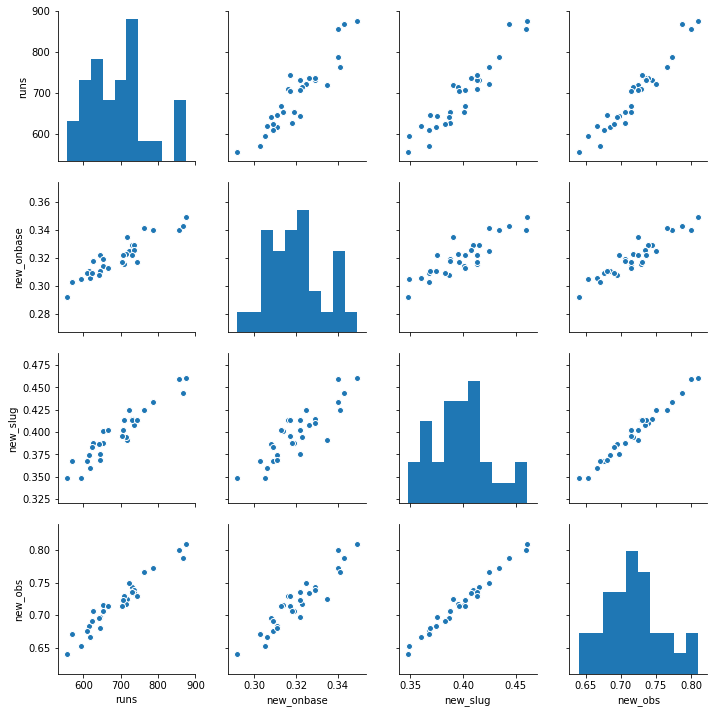

In [33]:
a = ['runs','new_onbase', 'new_slug', 'new_obs'] #3 features
a = pd.DataFrame(mlb[a])
_ = sns.pairplot(a)
plt.show()